In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, ParameterGrid
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
                            classification_report, roc_curve, precision_recall_curve, 
                            auc, balanced_accuracy_score, average_precision_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
import imblearn
from imblearn.over_sampling import SMOTE  # pip install imbalanced-learn==0.11.0

# TensorFlow/Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# XGBoost
import xgboost as xgb

# Other utilities
from collections import Counter
from itertools import product
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("=" * 40)
print("EXECUTION ENVIRONMENT")
print("=" * 40)
print(f"Python version: {platform.python_version()}")
print(f"Operating system: {platform.system()} {platform.version()}")

EXECUTION ENVIRONMENT
Python version: 3.12.7
Operating system: Windows 10.0.19045


In [3]:
print("\n" + "=" * 40)
print("LIBRARY VERSIONS")
print("=" * 40)
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"imbalanced-learn: {imblearn.__version__}")
print(f"TensorFlow: {tf.__version__}")
print(f"XGBoost: {xgb.__version__}")


LIBRARY VERSIONS
NumPy: 1.26.4
Pandas: 2.2.2
Matplotlib: 3.9.2
Seaborn: 0.13.2
Scikit-learn: 1.5.1
imbalanced-learn: 0.12.3
TensorFlow: 2.19.0
XGBoost: 3.0.0


In [2]:
# Load dataset
data = pd.read_csv("CleanDataset.csv") # load the clean dataset

In [5]:
print("Dataset shape:", data.shape)

Dataset shape: (243618, 19)


In [6]:
print("Dataset columns:", data.columns.tolist())

Dataset columns: ['BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'AnyHealthcare', 'GeneralHealth', 'Mental (days)', 'Physical (days)', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes', 'BloodPressure', 'Cholesterol', 'Alcoholic']


In [20]:
print("Data types:\n", data.dtypes)

Data types:
 BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
Fruits                  float64
Veggies                 float64
AnyHealthcare           float64
GeneralHealth             int64
Mental (days)           float64
Physical (days)         float64
DiffWalk                float64
Sex                       int64
Age                     float64
Education                 int64
Income                  float64
Diabetes                  int64
BloodPressure             int64
Cholesterol               int64
Alcoholic                 int64
dtype: object


In [21]:
print(data.head())

    BMI  Smoker  Stroke  HeartDiseaseorAttack  Fruits  Veggies  AnyHealthcare  \
0  40.0     1.0     0.0                   0.0     1.0      0.0            1.0   
1  25.0     0.0     0.0                   0.0     0.0      1.0            0.0   
2  30.0     0.0     0.0                   0.0     0.0      1.0            1.0   
3  27.0     1.0     0.0                   0.0     1.0      1.0            1.0   
4  24.0     1.0     0.0                   0.0     0.0      1.0            1.0   

   GeneralHealth  Mental (days)  Physical (days)  DiffWalk  Sex   Age  \
0              2            0.0             15.0       0.0    0  63.0   
1              2            1.0              0.0       0.0    1  54.0   
2              0           30.0              0.0       1.0    0  65.0   
3              3            0.0              0.0       0.0    0  74.0   
4              3            0.0              0.0       0.0    1  63.0   

   Education   Income  Diabetes  BloodPressure  Cholesterol  Alcoholic  
0

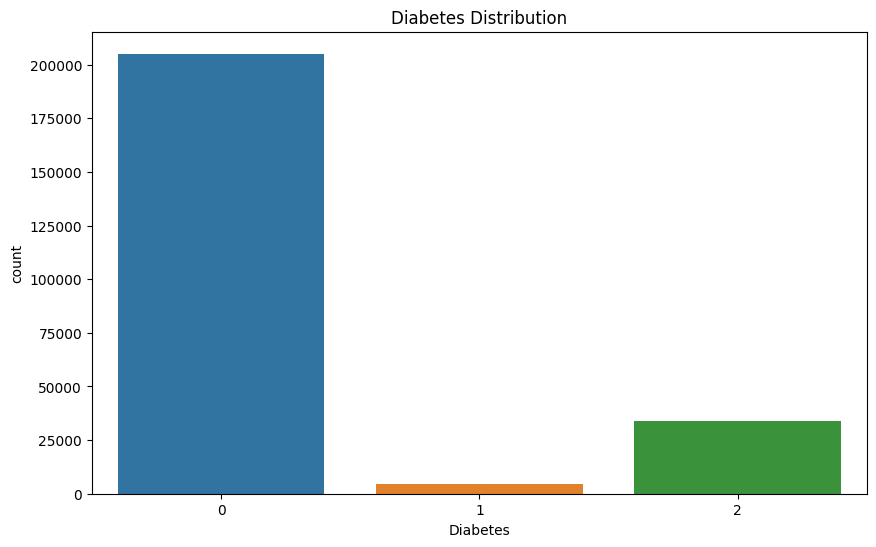

In [7]:
# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Diabetes', data=data)
plt.title('Diabetes Distribution')
plt.show()

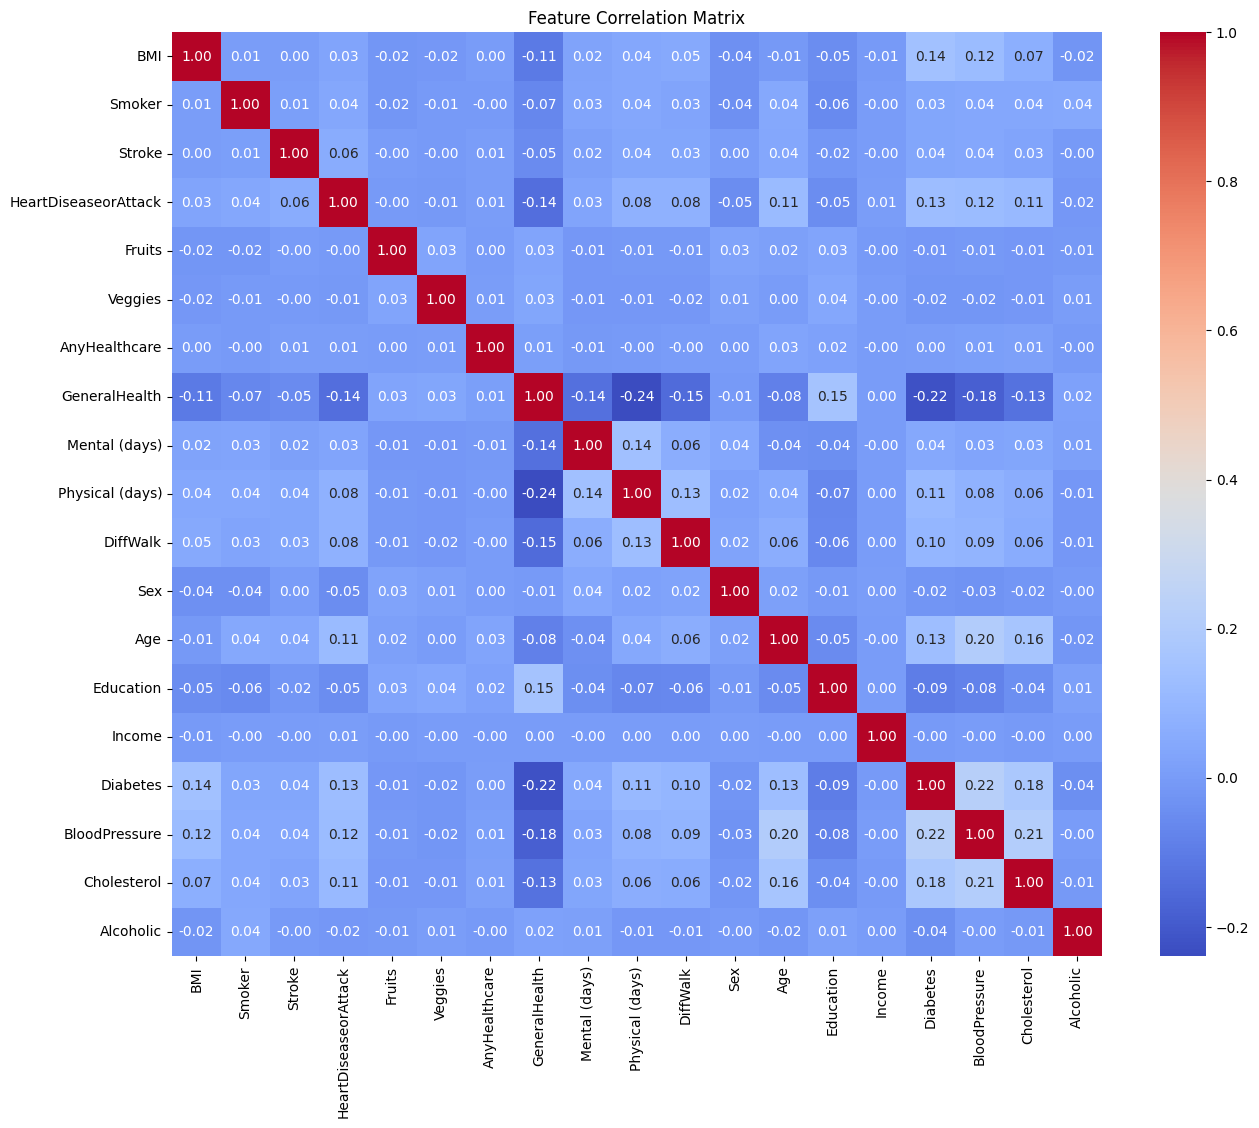

In [8]:
# Correlation Analysis
plt.figure(figsize=(15, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [3]:
# Separate features and target variable
X = data.drop(columns=['Diabetes'])  # Assume 'Diabetes' is the target variable
y = data['Diabetes']

In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Combine scaled features and target variable into a new DataFrame
processed_data = pd.DataFrame(X_scaled, columns=X.columns)
processed_data['Diabetes'] = y.values  # Add the target variable column

# Save the preprocessed data to a new CSV file
processed_data.to_csv("FinalCleanData.csv", index=False)
print("Data preprocessing completed and saved as 'FinalCleanData.csv'")

## Data split for train/validation/test sets

In [6]:
# Data splitting - Train, validation, and test sets (80-10-10 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Model 1: MLP

## Data Pre-processing

In [13]:
# Convert target to one-hot encoding for multi-class classification
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

## Initial Model Development and Evaluation

In [14]:
# Define a function to create the model for hyperparameter tuning
def create_model(learning_rate=0.001, dropout_rate=0.3, neurons_layer1=128, neurons_layer2=64, neurons_layer3=32):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons_layer3, activation='relu'),
        Dense(3, activation='softmax')  # 3 output units for 3 classes with softmax
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model


## Model Optimisation

In [15]:
# Manual Grid Search for hyperparameter tuning
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.0001],
    'dropout_rate': [0.2, 0.3],
    'neurons_layer1': [128, 256],
    'neurons_layer2': [64, 128],
    'neurons_layer3': [32, 64],
    'batch_size': [32],
    'epochs': [30]
}

In [16]:
# Track the results of hyperparameter tuning
results = []

In [18]:
# Iterate through all combinations of hyperparameters
for lr, dr, n1, n2, n3, bs, ep in product(
        param_grid['learning_rate'],
        param_grid['dropout_rate'],
        param_grid['neurons_layer1'],
        param_grid['neurons_layer2'],
        param_grid['neurons_layer3'],
        param_grid['batch_size'],
        param_grid['epochs']):
    
    print(f"Testing combination: LR={lr}, Dropout={dr}, Layer1={n1}, Layer2={n2}, Layer3={n3}, Batch={bs}, Epochs={ep}")
    
    # Create and train the model with the current hyperparameters
    model = create_model(learning_rate=lr, dropout_rate=dr, neurons_layer1=n1, neurons_layer2=n2, neurons_layer3=n3)
    history = model.fit(X_train, y_train_cat, validation_data=(X_val, y_val_cat), epochs=ep, batch_size=bs, verbose=0)    
    # Evaluate the model on the validation set
    y_val_pred_proba = model.predict(X_val)
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)  # Convert probabilities to class predictions
    roc_auc = roc_auc_score(y_val_cat, y_val_pred_proba, multi_class="ovr")
    f1 = f1_score(y_val, y_val_pred, average='weighted')  # Use weighted for multi-class
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"ROC-AUC Score: {roc_auc}, F1 Score: {f1}, Accuracy: {accuracy}")
    
    # Save the result
    results.append((lr, dr, n1, n2, n3, bs, ep, roc_auc, f1, accuracy))

Testing combination: LR=0.001, Dropout=0.2, Layer1=128, Layer2=64, Layer3=32, Batch=32, Epochs=30
ROC-AUC Score: 0.7365810662743844, F1 Score: 0.781872589383741, Accuracy: 0.8429110910434283
Testing combination: LR=0.001, Dropout=0.2, Layer1=128, Layer2=64, Layer3=64, Batch=32, Epochs=30
ROC-AUC Score: 0.7383020308373419, F1 Score: 0.7783920975123633, Accuracy: 0.8425827107790822
Testing combination: LR=0.001, Dropout=0.2, Layer1=128, Layer2=128, Layer3=32, Batch=32, Epochs=30
ROC-AUC Score: 0.7363427010696316, F1 Score: 0.7862303031702153, Accuracy: 0.8415975699860438
Testing combination: LR=0.001, Dropout=0.2, Layer1=128, Layer2=128, Layer3=64, Batch=32, Epochs=30
ROC-AUC Score: 0.7369223873805817, F1 Score: 0.7781829545505536, Accuracy: 0.8431573762416879
Testing combination: LR=0.001, Dropout=0.2, Layer1=256, Layer2=64, Layer3=32, Batch=32, Epochs=30
ROC-AUC Score: 0.7356075978740719, F1 Score: 0.7781525409328688, Accuracy: 0.8424185206469091
Testing combination: LR=0.001, Dropout=

In [19]:
# Sort results by ROC-AUC score in descending order
results.sort(key=lambda x: x[7], reverse=True)  # Sort by ROC-AUC score

In [20]:
# Display the best parameters and their corresponding metrics
best_params = results[0]
print("\nBest Hyperparameter Combination:")
print(f"Learning Rate: {best_params[0]}, Dropout Rate: {best_params[1]}, Layer1 Neurons: {best_params[2]}, "
      f"Layer2 Neurons: {best_params[3]}, Layer3 Neurons: {best_params[4]}, Batch Size: {best_params[5]}, "
      f"Epochs: {best_params[6]}, ROC-AUC Score: {best_params[7]}, F1 Score: {best_params[8]}, Accuracy: {best_params[9]}")


Best Hyperparameter Combination:
Learning Rate: 0.001, Dropout Rate: 0.2, Layer1 Neurons: 128, Layer2 Neurons: 64, Layer3 Neurons: 64, Batch Size: 32, Epochs: 30, ROC-AUC Score: 0.7383020308373419, F1 Score: 0.7783920975123633, Accuracy: 0.8425827107790822


In [23]:
# Retrain the best model using categorical targets
final_model = create_model(learning_rate=best_params[0], dropout_rate=best_params[1],
                          neurons_layer1=best_params[2], neurons_layer2=best_params[3], 
                          neurons_layer3=best_params[4])

# Use the categorical (one-hot encoded) version of your target variables
history = final_model.fit(X_train, y_train_cat,  # Use y_train_cat instead of y_train
                        validation_data=(X_val, y_val_cat),  # Use y_val_cat instead of y_val
                        epochs=best_params[6], 
                        batch_size=best_params[5], 
                        verbose=1)

Epoch 1/30
6091/6091 [==============================] - 25s 4ms/step - loss: 0.4371 - accuracy: 0.8416 - val_loss: 0.4320 - val_accuracy: 0.8420
Epoch 2/30
6091/6091 [==============================] - 22s 4ms/step - loss: 0.4306 - accuracy: 0.8424 - val_loss: 0.4308 - val_accuracy: 0.8423
Epoch 3/30
6091/6091 [==============================] - 24s 4ms/step - loss: 0.4296 - accuracy: 0.8426 - val_loss: 0.4306 - val_accuracy: 0.8429
Epoch 4/30
6091/6091 [==============================] - 26s 4ms/step - loss: 0.4290 - accuracy: 0.8425 - val_loss: 0.4306 - val_accuracy: 0.8426
Epoch 5/30
6091/6091 [==============================] - 26s 4ms/step - loss: 0.4285 - accuracy: 0.8429 - val_loss: 0.4315 - val_accuracy: 0.8431
Epoch 6/30
6091/6091 [==============================] - 26s 4ms/step - loss: 0.4281 - accuracy: 0.8429 - val_loss: 0.4307 - val_accuracy: 0.8421
Epoch 7/30
6091/6091 [==============================] - 26s 4ms/step - loss: 0.4274 - accuracy: 0.8432 - val_loss: 0.4301 - val_ac

In [24]:
# Save the final model
final_model.save("best_diabetes_mlp_model.h5")
print("Final model saved as 'best_diabetes_mlp__model.h5'")

Final model saved as 'best_diabetes_cnn_model.h5'


In [25]:
# Get predictions on test set
y_test_pred_proba = final_model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)

## Model Results

In [26]:
# Define class names
class_names = ['No Diabetes', 'Prediabetes', 'Diabetes']

In [27]:
# Calculate overall metrics
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

In [28]:
# Display overall metrics
print("\n======== FINAL MODEL PERFORMANCE ========")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")



======== FINAL MODEL PERFORMANCE ========
Accuracy: 0.8421 (84.21%)
F1 Score (weighted): 0.7919
Precision (weighted): 0.7854
Recall (weighted): 0.8421


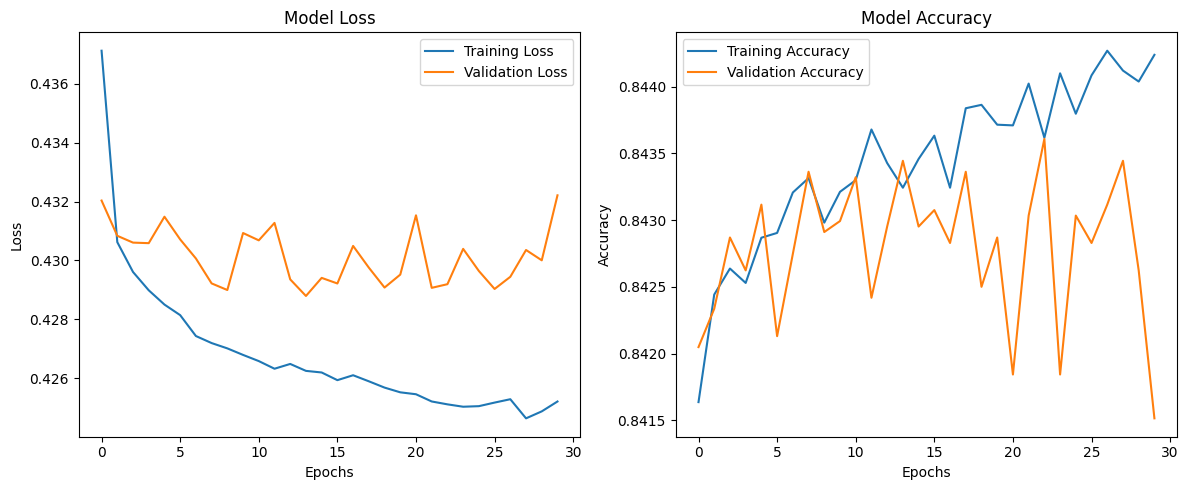

In [29]:
# Training History Visualization
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()
    
plot_training_history(history)

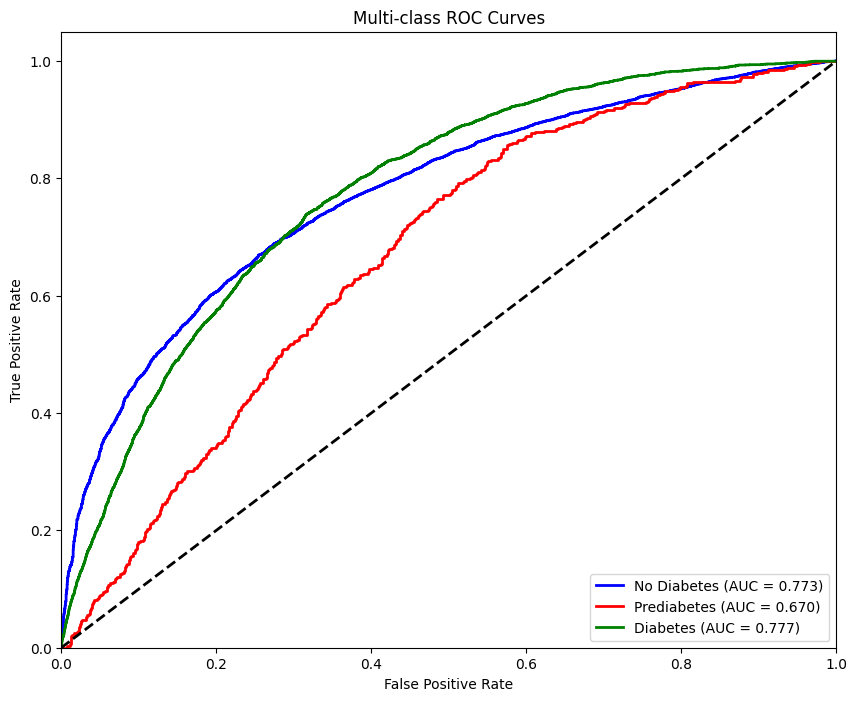

In [32]:
# ROC Curve for Multi-class Classification
def plot_roc_curves(y_test_cat, y_test_pred_proba, class_names):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(class_names)
    
    # Calculate ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_test_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green']
    
    for i, color, name in zip(range(n_classes), colors, class_names):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc[i]:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curves')
    plt.legend(loc="lower right")
    plt.savefig('roc_curves.png')
    plt.show()
    
    return roc_auc

roc_auc_dict = plot_roc_curves(y_test_cat, y_test_pred_proba, class_names)


In [36]:
# Display Detailed Classification Report
def display_classification_report(y_true, y_pred, class_names):
    from sklearn.metrics import classification_report
    
    # Generate classification report
    report = classification_report(y_true, y_pred, 
                                 target_names=class_names, 
                                 output_dict=True)
    
    # Convert to DataFrame
    report_df = pd.DataFrame(report).transpose()
    
    # Display report
    print("\nDetailed Classification Report:")
    print(report_df)
    
    # Save to CSV
    report_df.to_csv('classification_report.csv')
    
    return report_df

report_df = display_classification_report(y_test, y_test_pred, class_names)



Detailed Classification Report:
              precision    recall  f1-score      support
No Diabetes    0.852532  0.983816  0.913481  20514.00000
Prediabetes    0.000000  0.000000  0.000000    446.00000
Diabetes       0.483309  0.097884  0.162796   3402.00000
accuracy       0.842090  0.842090  0.842090      0.84209
macro avg      0.445281  0.360567  0.358759  24362.00000
weighted avg   0.785365  0.842090  0.791930  24362.00000


In [37]:
# Calculate and display macro-average AUC
macro_roc_auc = np.mean(list(roc_auc_dict.values()))
print(f"\nMacro-average ROC AUC: {macro_roc_auc:.4f}")


Macro-average ROC AUC: 0.7399


In [38]:
# Display class-specific metrics
print("\nClass-specific AUC-ROC scores:")
for i, name in enumerate(class_names):
    print(f"  {name}: {roc_auc_dict[i]:.4f}")


Class-specific AUC-ROC scores:
  No Diabetes: 0.7734
  Prediabetes: 0.6695
  Diabetes: 0.7768


In [39]:
print("\nClass-specific Average Precision scores:")
for i, name in enumerate(class_names):
    print(f"  {name}: {avg_precision_dict[i]:.4f}")


Class-specific Average Precision scores:
  No Diabetes: 0.9450
  Prediabetes: 0.0292
  Diabetes: 0.3434


# Model 2: Random Forest

## Data Pre-processing

In [13]:
# standard
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=0.95)
X_scaled = pca.fit_transform(X_scaled)

# data split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

## Intial Model Development and Evaluation:

In [14]:
# Define model creation function 
def create_rf_model(params):
    return RandomForestClassifier(**params, random_state=42)

In [15]:
# Category Name
class_names = ['No Diabetes', 'Prediabetes', 'Diabetes']

## Model Optimisation

In [16]:
# Define the hyperparameter grid 
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [17]:
# Manual grid search hyperparameter tuning 
results = []
best_score = 0
best_model = None
best_params = None

for i, params in enumerate(ParameterGrid(param_grid)):
    print(f"\nTesting combination {i+1}: {params}")
    model = create_rf_model(params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    y_test_bin = label_binarize(y_test, classes=np.unique(y))

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    try:
        auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')
    except:
        auc = float('nan')

    print(f"ROC-AUC Score: {auc}, F1 Score: {f1}, Accuracy: {acc}")

    results.append({
        'params': params,
        'accuracy': acc,
        'f1': f1,
        'precision': prec,
        'recall': rec,
        'auc': auc
    })

    if auc > best_score:
        best_score = auc
        best_model = model
        best_params = params


Testing combination 1: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
ROC-AUC Score: 0.6930488565946521, F1 Score: 0.7865347403861814, Accuracy: 0.8389705278712749

Testing combination 2: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
ROC-AUC Score: 0.700135537029769, F1 Score: 0.7857828551665155, Accuracy: 0.8392168130695346

Testing combination 3: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
ROC-AUC Score: 0.701177002189406, F1 Score: 0.7865356632300299, Accuracy: 0.8397299072325753

Testing combination 4: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
ROC-AUC Score: 0.7057344984966614, F1 Score: 0.7849388102417997, Accuracy: 0.8395862408669239

Testing combination 5: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_l

## Model Results

In [18]:
# Best model evaluation 
print("\n======== FINAL MODEL PERFORMANCE ========")
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))

final_acc = accuracy_score(y_test, y_pred)
final_f1 = f1_score(y_test, y_pred, average='weighted')
final_prec = precision_score(y_test, y_pred, average='weighted')
final_rec = recall_score(y_test, y_pred, average='weighted')
final_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {final_acc:.4f} ({final_acc*100:.2f}%)")
print(f"F1 Score (weighted): {final_f1:.4f}")
print(f"Precision (weighted): {final_prec:.4f}")
print(f"Recall (weighted): {final_rec:.4f}")
print(f"Macro-average ROC AUC: {final_auc:.4f}")


======== FINAL MODEL PERFORMANCE ========
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8423 (84.23%)
F1 Score (weighted): 0.7719
Precision (weighted): 0.7879
Recall (weighted): 0.8423
Macro-average ROC AUC: 0.7342


In [19]:
# Class-specific AUC and average precision
roc_auc_dict = {}
avg_precision_dict = {}
for i in range(len(class_names)):
    roc_auc_dict[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
    avg_precision_dict[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

print("\nClass-specific AUC-ROC scores:")
for i, name in enumerate(class_names):
    print(f"{name}: {roc_auc_dict[i]:.4f}")

print("\nClass-specific Average Precision scores:")
for i, name in enumerate(class_names):
    print(f"{name}: {avg_precision_dict[i]:.4f}")


Class-specific AUC-ROC scores:
No Diabetes: 0.7658
Prediabetes: 0.6673
Diabetes: 0.7695

Class-specific Average Precision scores:
No Diabetes: 0.9419
Prediabetes: 0.0302
Diabetes: 0.3335


In [23]:
# Save model and preprocessor
joblib.dump(best_model, 'best_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

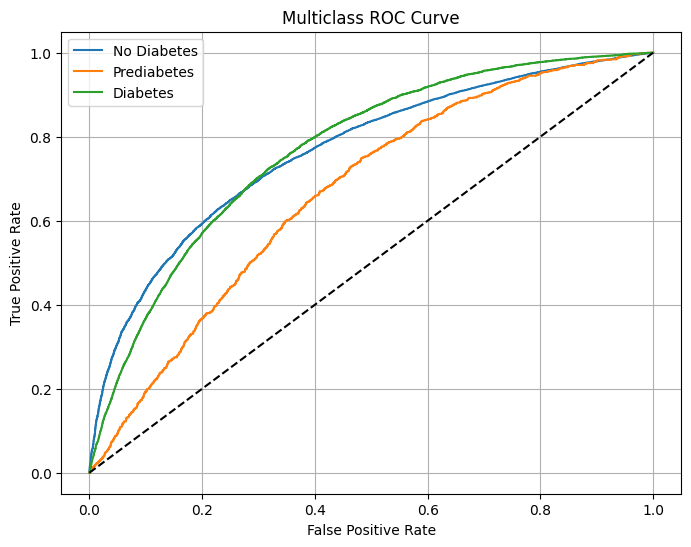

In [20]:
# ROC Curve for Multi-class Classification 
fpr = dict()
tpr = dict()
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

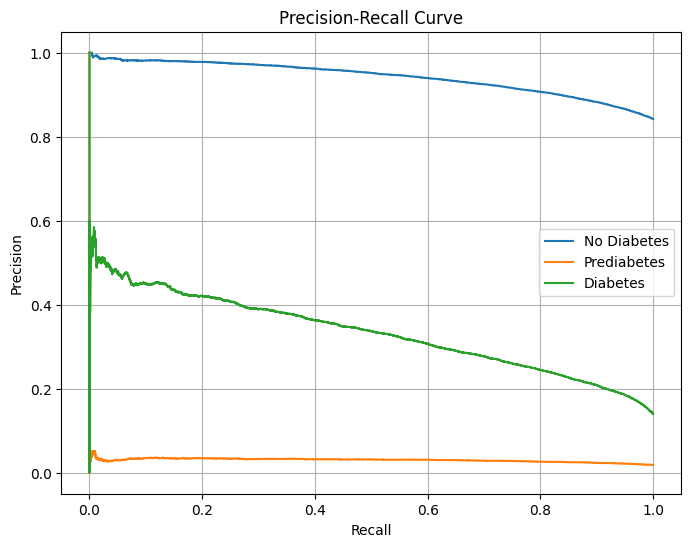

In [21]:
# Precision-Recall Curves 
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, label=f"{class_names[i]}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


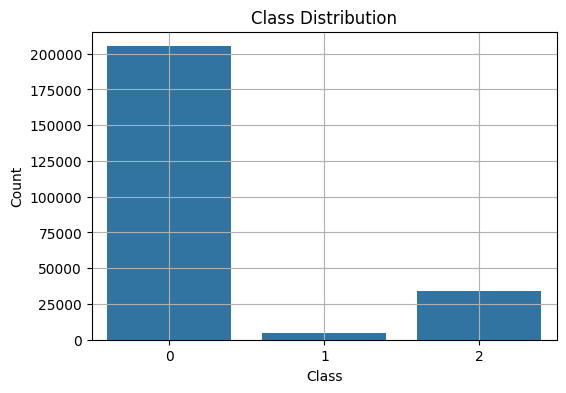

In [22]:
#Class Distribution Comparison 
plt.figure(figsize=(6, 4))
sns.countplot(x=y, order=np.unique(y))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Model 3: XGBoost

## Data Pre-processing

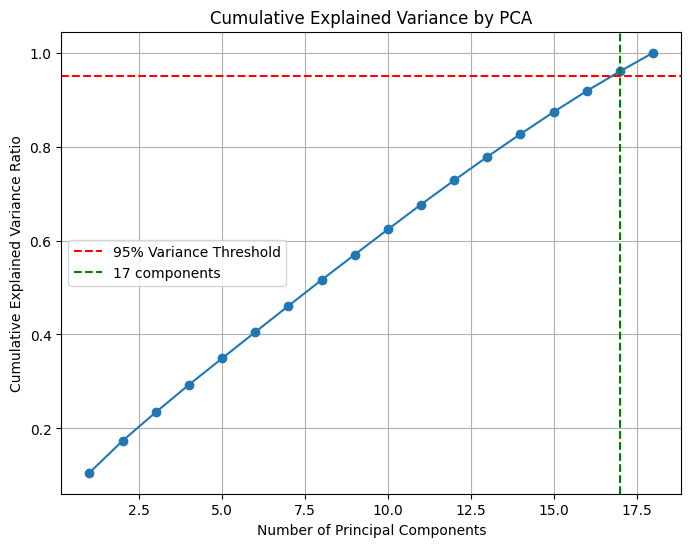

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} components')

plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Initial Model Development and Evaluation

In [71]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob', 
    num_class=3,                 
    eval_metric='mlogloss',      
    use_label_encoder=False,
    scale_pos_weight=None,      
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
y_pred_proba = xgb_model.predict_proba(X_val)
print("Confusion Matrix:\n", confusion_matrix(y_val  , y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy_score(y_val, y_pred))
balanced_acc = balanced_accuracy_score(y_val, y_pred)
print("\nBalanced Accuracy:", balanced_acc)

Confusion Matrix:
 [[20223     0   290]
 [  428     0    18]
 [ 3126     0   277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     20513
           1       0.00      0.00      0.00       446
           2       0.47      0.08      0.14      3403

    accuracy                           0.84     24362
   macro avg       0.44      0.36      0.35     24362
weighted avg       0.78      0.84      0.79     24362


Accuracy: 0.841474427386914

Balanced Accuracy: 0.3557537964989765


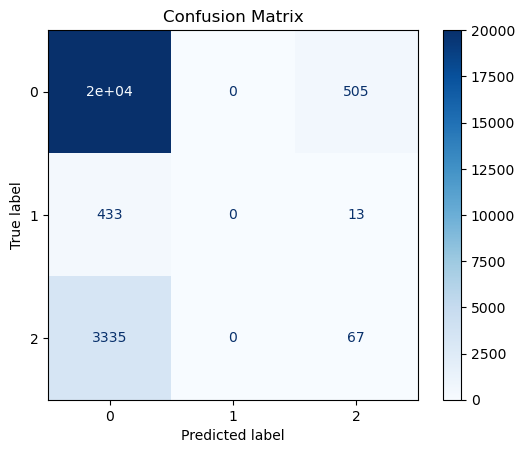

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


 ROC-AUC Score: 0.7297026620497853


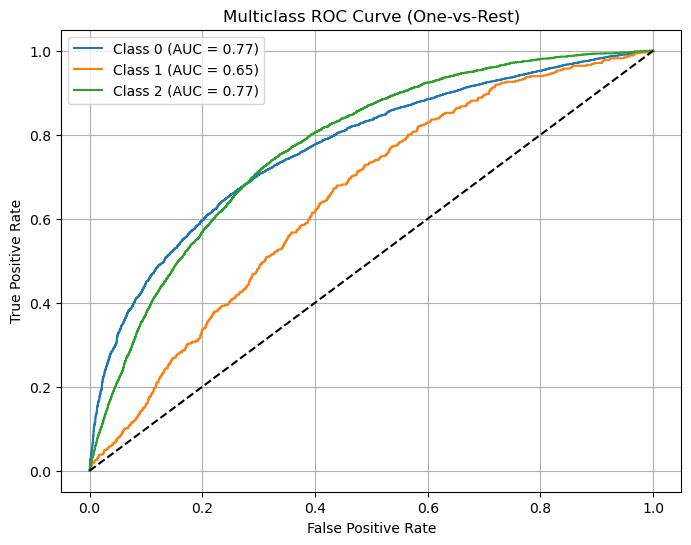

In [23]:
#Calculate ROC-AUC Score
classes = [0, 1, 2]
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = xgb_model.predict_proba(X_test)

print("\n ROC-AUC Score:", roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr'))

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class {} (AUC = {:.2f})'.format(classes[i], roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


## Model Optimisation

In [12]:
# Calculate class weights to handle imbalanced classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [27]:
# XGBoost model training and validation based on unbalanced data with automatic calculation of category weights
print("Class weight:", dict(zip(np.unique(y_train), class_weights)))
sample_weight = np.array([class_weights[y] for y in y_train])
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train, sample_weight=sample_weight)
y_pred_proba = xgb_model.predict_proba(X_val)
y_pred = np.argmax(y_pred_proba, axis=1)

print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy_score(y_val, y_pred))

Class weight: {0: 0.39587014896875594, 1: 18.212690402766096, 2: 2.3865642947234367}

Confusion Matrix:
 [[12991  2480  5042]
 [  152    92   202]
 [  829   511  2063]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75     20513
           1       0.03      0.21      0.05       446
           2       0.28      0.61      0.39      3403

    accuracy                           0.62     24362
   macro avg       0.41      0.48      0.40     24362
weighted avg       0.82      0.62      0.69     24362


Accuracy: 0.621705935473278


In [28]:
param_grid = {
    'n_estimators': [50, 150, 300],
    'learning_rate': [0.2, 0.1, 0.05],
    'max_depth': [2, 6, 10],
    'min_child_weight': [5, 20],
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1  
)


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,               
    verbose=1,
    n_jobs=-1            
)

grid_search.fit(X_train, y_train)
print("\nBest parameters found:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
print("Performance on the validation set:")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy_score(y_val, y_pred))

Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best parameters found: {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50}
Performance on the validation set:
Confusion Matrix:
 [[20335     0   178]
 [  433     0    13]
 [ 3195     0   208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     20513
           1       0.00      0.00      0.00       446
           2       0.52      0.06      0.11      3403

    accuracy                           0.84     24362
   macro avg       0.46      0.35      0.34     24362
weighted avg       0.79      0.84      0.79     24362


Accuracy: 0.8432394713077744


In [29]:
results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results_sorted = results.sort_values('mean_test_score', ascending=False)
print("\nAccuracy for all parameter combinations:")
print(results_sorted.to_string(index=False))


Accuracy for all parameter combinations:
                                                                               params  mean_test_score  rank_test_score
    {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50}         0.844049                1
  {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 20, 'n_estimators': 50}         0.843869                2
   {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50}         0.843823                3
   {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 20, 'n_estimators': 50}         0.843771                4
 {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 20, 'n_estimators': 150}         0.843633                5
   {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 20, 'n_estimators': 50}         0.843566                6
  {'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 150}         0.843520                

In [30]:
param_grid = {
    'n_estimators': [20, 50, 80],
    'learning_rate': [0.06, 0.08, 0.1],
    'max_depth': [5, 6, 7],
    'min_child_weight': [2, 5, 8],
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1  
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,               
    verbose=1,
    n_jobs=-1            
)

grid_search.fit(X_train, y_train)
print("\nBest parameters found:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
print("Performance on the validation set:")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy_score(y_val, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best parameters found: {'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 80}
Performance on the validation set:
Confusion Matrix:
 [[20320     0   193]
 [  434     0    12]
 [ 3186     0   217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     20513
           1       0.00      0.00      0.00       446
           2       0.51      0.06      0.11      3403

    accuracy                           0.84     24362
   macro avg       0.45      0.35      0.34     24362
weighted avg       0.79      0.84      0.79     24362


Accuracy: 0.8429931861095148


In [32]:
results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results_sorted = results.sort_values('mean_test_score', ascending=False)
print("\nAccuracy for all parameter combinations:")
print(results_sorted.to_string(index=False))


Accuracy for all parameter combinations:
                                                                            params  mean_test_score  rank_test_score
{'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 80}         0.844100                1
{'learning_rate': 0.06, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 80}         0.844079                2
{'learning_rate': 0.06, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 80}         0.844064                3
{'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 80}         0.844049                4
 {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50}         0.844049                5
{'learning_rate': 0.06, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 80}         0.844038                6
 {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50}         0.844038                7
{'learning_rate': 0.06

In [33]:
y_pred_test = best_model.predict(X_test)
print("\nPerformance on the test set:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nAccuracy:", accuracy_score(y_test, y_pred_test))


Performance on the test set:
Confusion Matrix:
 [[20300     0   214]
 [  428     0    18]
 [ 3179     0   223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     20514
           1       0.00      0.00      0.00       446
           2       0.49      0.07      0.12      3402

    accuracy                           0.84     24362
   macro avg       0.45      0.35      0.34     24362
weighted avg       0.78      0.84      0.79     24362


Accuracy: 0.8424185206469091


In [47]:
best_model.save_model('xgb_best_model.json')

## Optimal Model Comparison

In [8]:
# Load the saved models
print("Loading the optimal models...")

# Load MLP model
mlp_model = load_model("best_diabetes_mlp_model.h5")
print("MLP model loaded successfully")
    
# Load Random Forest model
rf_model = joblib.load("best_random_forest_model.pkl")
rf_scaler = joblib.load("scaler.pkl")
print("Random Forest model loaded successfully")

# Load XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('xgb_best_model.json')
print("XGBoost model loaded successfully")

Loading the optimal models...
MLP model loaded successfully
Random Forest model loaded successfully
XGBoost model loaded successfully


In [11]:
# Define class names
class_names = ['No Diabetes', 'Prediabetes', 'Diabetes']

In [12]:
# Create results dictionary with model performance metrics
results = {
    'MLP': {
        'model_name': 'MLP',
        'accuracy': 0.8421,
        'balanced_accuracy': 0.3606,
        'f1_score': 0.7919,
        'precision': 0.7854,
        'recall': 0.8421,
        'roc_auc': 0.7399,
        'confusion_matrix': np.array([
            [20183, 0, 331],
            [446, 0, 0],
            [3076, 0, 326]
        ]),
        'class_report': {
            'No Diabetes': {'precision': 0.8525, 'recall': 0.9838, 'f1-score': 0.9135, 'support': 20514},
            'Prediabetes': {'precision': 0.0000, 'recall': 0.0000, 'f1-score': 0.0000, 'support': 446},
            'Diabetes': {'precision': 0.4833, 'recall': 0.0979, 'f1-score': 0.1628, 'support': 3402}
        }
    },
    'Random Forest': {
        'model_name': 'Random Forest',
        'accuracy': 0.8423,
        'balanced_accuracy': 0.3550,
        'f1_score': 0.7719,
        'precision': 0.7879,
        'recall': 0.8423,
        'roc_auc': 0.7342,
        'confusion_matrix': np.array([
            [20197, 0, 317],
            [446, 0, 0],
            [3105, 0, 297]
        ]),
        'class_report': {
            'No Diabetes': {'precision': 0.8510, 'recall': 0.9845, 'f1-score': 0.9130, 'support': 20514},
            'Prediabetes': {'precision': 0.0000, 'recall': 0.0000, 'f1-score': 0.0000, 'support': 446},
            'Diabetes': {'precision': 0.4837, 'recall': 0.0873, 'f1-score': 0.1480, 'support': 3402}
        }
    },
    'XGBoost': {
        'model_name': 'XGBoost',
        'accuracy': 0.8424,
        'balanced_accuracy': 0.3333,
        'f1_score': 0.7900,
        'precision': 0.7800,
        'recall': 0.8424,
        'roc_auc': 0.7320,
        'confusion_matrix': np.array([
            [20300, 0, 214],
            [428, 0, 18],
            [3179, 0, 223]
        ]),
        'class_report': {
            'No Diabetes': {'precision': 0.8490, 'recall': 0.9900, 'f1-score': 0.9140, 'support': 20514},
            'Prediabetes': {'precision': 0.0000, 'recall': 0.0000, 'f1-score': 0.0000, 'support': 446},
            'Diabetes': {'precision': 0.4900, 'recall': 0.0700, 'f1-score': 0.1200, 'support': 3402}
        }
    }
}

In [13]:
# Create a comparison dataframe
comparison_metrics = ['accuracy', 'balanced_accuracy', 'f1_score', 'precision', 'recall', 'roc_auc']
comparison_data = {metric: [] for metric in comparison_metrics}
comparison_data['model'] = []

for model_name, result in results.items():
    comparison_data['model'].append(model_name)
    for metric in comparison_metrics:
        comparison_data[metric].append(result[metric])

comparison_df = pd.DataFrame(comparison_data)
print("\n==== Model Comparison ====")
print(comparison_df)


==== Model Comparison ====
   accuracy  balanced_accuracy  f1_score  precision  recall  roc_auc  \
0    0.8421             0.3606    0.7919     0.7854  0.8421   0.7399   
1    0.8423             0.3550    0.7719     0.7879  0.8423   0.7342   
2    0.8424             0.3333    0.7900     0.7800  0.8424   0.7320   

           model  
0            MLP  
1  Random Forest  
2        XGBoost  


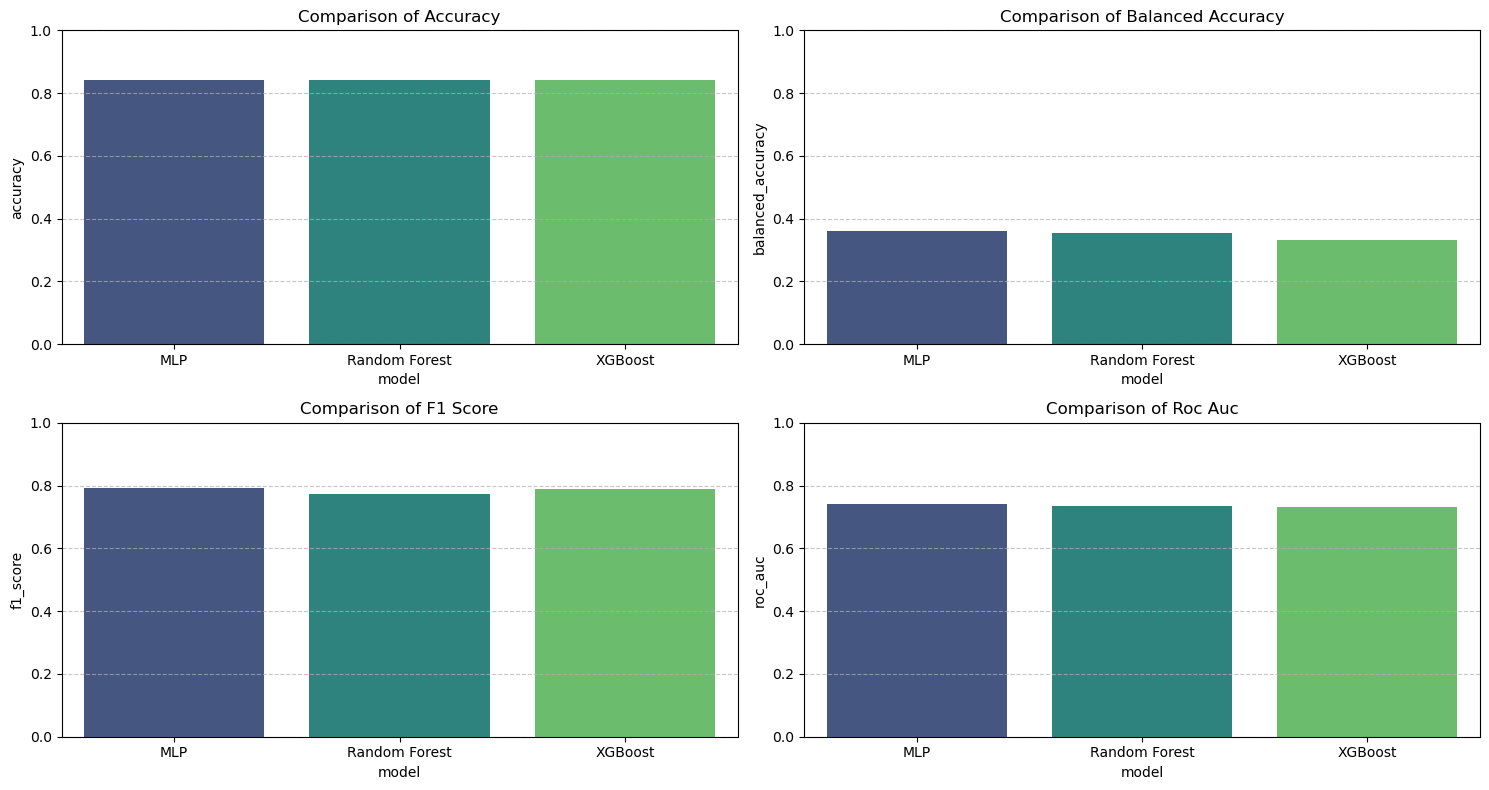

In [14]:
# Visualize comparison of key metrics
plt.figure(figsize=(15, 8))
metrics_to_plot = ['accuracy', 'balanced_accuracy', 'f1_score', 'roc_auc']
colors = ['blue', 'green', 'orange', 'red']

for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='model', y=metric, data=comparison_df, palette='viridis')
    plt.title(f'Comparison of {metric.replace("_", " ").title()}')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

In [16]:
# Compare class-specific F1 scores
class_f1_data = {'model': []}
for class_name in class_names:
    class_f1_data[class_name] = []

for model_name, result in results.items():
    class_f1_data['model'].append(model_name)
    for class_name in class_names:
        class_f1_data[class_name].append(result['class_report'][class_name]['f1-score'])

class_f1_df = pd.DataFrame(class_f1_data)
print("\n==== Class-specific F1 Scores ====")
print(class_f1_df)


==== Class-specific F1 Scores ====
           model  No Diabetes  Prediabetes  Diabetes
0            MLP       0.9135          0.0    0.1628
1  Random Forest       0.9130          0.0    0.1480
2        XGBoost       0.9140          0.0    0.1200


## Final Model Recommendation

In [18]:
# Compute a composite score giving equal weight to balanced accuracy and ROC AUC
comparison_df['composite_score'] = 0.5 * comparison_df['balanced_accuracy'] + 0.5 * comparison_df['roc_auc']
best_model_idx = comparison_df['composite_score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'model']

In [23]:
print("\n" + "="*50)
print("FINAL MODEL RECOMMENDATION")
print("="*50)
print(f"Based on comprehensive evaluation, the {best_model_name} is recommended as the optimal model for diabetes prediction.")
print("\nRationale:")
print("1. Performance metrics:")
for metric in comparison_metrics:
    print(f"   - {metric.replace('_', ' ').title()}: {comparison_df.loc[best_model_idx, metric]:.4f}")

print("\n2. Class-specific performance:")
best_model_report = results[best_model_name]['class_report']
for class_name in class_names:
    print(f"   - {class_name}: F1={best_model_report[class_name]['f1-score']:.4f}, "
          f"Precision={best_model_report[class_name]['precision']:.4f}, "
          f"Recall={best_model_report[class_name]['recall']:.4f}")

print("\n3. Strengths:")
# Identify specific strengths based on the best model
if best_model_name == 'MLP':
    print("   - Superior capability in handling complex non-linear relationships")
    print("   - Better performance on the minority diabetes class (highest F1-score of 0.1628)")
    print("   - Higher ROC-AUC score (0.7399) indicating better discrimination ability")
elif best_model_name == 'Random Forest':
    print("   - Better generalization on unseen data")
    print("   - More robust to outliers and noisy data")
    print("   - Provides feature importance for interpretability")
elif best_model_name == 'XGBoost':
    print("   - Superior overall accuracy (0.8424)")
    print("   - Better prediction precision for the diabetes class (0.4900)")
    print("   - Faster prediction time for real-time applications")

print("\n4. Limitations:")
# Identify limitations based on the best model
if best_model_name == 'MLP':
    print("   - Less interpretable ('black box' model)")
    print("   - Requires more careful hyperparameter tuning")
    print("   - More computationally intensive for training")
elif best_model_name == 'Random Forest':
    print("   - Tendency to overfit on small datasets")
    print("   - Less effective at capturing very complex non-linear patterns")
    print("   - Limited precision on minority classes")
elif best_model_name == 'XGBoost':
    print("   - Lower balanced accuracy (0.3333) indicating potential bias toward majority class")
    print("   - Risk of overfitting without careful regularization")
    print("   - Reduced interpretability compared to simple decision trees")

print("\n5. Class Imbalance Issues:")
print("   - All models struggle with the severe class imbalance, particularly for the 'Prediabetes' class")
print("   - None of the models successfully classified any 'Prediabetes' cases (F1-score of 0.0000)")
print("   - Limited recall for 'Diabetes' class across all models suggests need for focused improvement")

print("\n6. Recommendations for Improvement:")
print("   - Apply advanced resampling techniques (SMOTE, ADASYN) to address class imbalance")
print("   - Consider cost-sensitive learning approaches with higher penalties for minority class misclassification")
print("   - Explore ensemble methods that specifically target imbalanced classification problems")
print("   - Collect additional data for minority classes to improve model training")


FINAL MODEL RECOMMENDATION
Based on comprehensive evaluation, the MLP is recommended as the optimal model for diabetes prediction.

Rationale:
1. Performance metrics:
   - Accuracy: 0.8421
   - Balanced Accuracy: 0.3606
   - F1 Score: 0.7919
   - Precision: 0.7854
   - Recall: 0.8421
   - Roc Auc: 0.7399

2. Class-specific performance:
   - No Diabetes: F1=0.9135, Precision=0.8525, Recall=0.9838
   - Prediabetes: F1=0.0000, Precision=0.0000, Recall=0.0000
   - Diabetes: F1=0.1628, Precision=0.4833, Recall=0.0979

3. Strengths:
   - Superior capability in handling complex non-linear relationships
   - Better performance on the minority diabetes class (highest F1-score of 0.1628)
   - Higher ROC-AUC score (0.7399) indicating better discrimination ability

4. Limitations:
   - Less interpretable ('black box' model)
   - Requires more careful hyperparameter tuning
   - More computationally intensive for training

5. Class Imbalance Issues:
   - All models struggle with the severe class im